In [ ]:
# Actividad Guiada 2
# https://colab.research.google.com/drive/1j9rniK5EY7KC8n_-ew9gZGoCQKhvayn5?usp=sharing

### Programación Dinámica

In [40]:
ALT = 999
OPC = []
TARIFAS = [[0,5,4,3,ALT,ALT,ALT],
           [ALT,0,ALT,2,3,ALT,11],
           [ALT, ALT,0,1,ALT,4,10],
           [ALT,ALT,ALT,0,5,6,9],
           [ALT, ALT, ALT, ALT, 0, ALT, 4],
           [ALT, ALT, ALT, ALT, ALT,0,3],
           [ALT, ALT, ALT, ALT, ALT, ALT, 0]]

###################################################
def Precios(TARIFAS):
  #Total de Nodos
  N = len(TARIFAS[0])

  #inicializacion de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]
  RUTA = [ [""]*N for i in [""]*N]

  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS [k][j] < MIN:
          MIN = min(MIN, PRECIOS[i][k]+ TARIFAS[k][j])
          RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS, RUTA

################################################

def calcular_ruta(RUTA, desde , hasta):
  if desde == hasta:
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta]) ) + ',' + str(RUTA[desde][hasta])

print("\nLa ruta es: ")

calcular_ruta


La ruta es: 


<function calcular_ruta at 0x7fcd002528c8>

###Ramificación y Poda

In [75]:
S = [0,1,2,3]
COSTES = [[11,12,18,40],
          [14,15,13,22],
          [11,17,19,23],
          [17,14,20,28]]

def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i]
  return VALOR 

valor(S,COSTES)

73

In [69]:
##Fuerza Bruta
import itertools as it
def fuerza_bruta(COSTES):

  mejor_valor = 10e10
  mejor_solucion = ()

  for s in list(it.permutations(range(len(COSTES)))):
    valor_tmp = valor(s,COSTES)
    if valor_tmp < mejor_valor :
      mejor_valor = valor_tmp
      mejor_solucion = s

  print("La Mejor solucion es: ", mejor_solucion, "con valor:", mejor_valor )

fuerza_bruta(COSTES)

La Mejor solucion es:  (0, 3, 1, 2) con valor: 61


In [70]:
#Cota inferior
def CI(S, COSTES):
  #Valores establecidos
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]
  #Estimacion
  for i in range( len(COSTES) ):
    if i not in S:
      VALOR += min( [COSTES[j][i] for j in range(len(S), len(COSTES))])
  return VALOR

In [71]:
#funcion para ramificar
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,) } )
  return HIJOS

In [72]:
#Proceso Principal
#@calcular_tiempo
def ramificacion_y_poda(COSTES):
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION = tuple(i for i in range(len(COSTES)))
  CotaSup = valor(MEJOR_SOLUCION, COSTES)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)})

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [min(NODOS, key=lambda x:x['ci'])][0]['s']

    HIJOS =[ {'s': x['s'], 'ci':CI(x['s'], COSTES)} for x in crear_hijos(nodo_prometedor, DIMENSION)]

    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION ]
    if len(NODO_FINAL ) > 0:
      if NODO_FINAL[0]['ci'] < CotaSup: 
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL
  
    HIJOS = [x for x in HIJOS  if x['ci'] < CotaSup]

    NODOS.extend(HIJOS)

    NODOS = [ x for x in NODOS if x['s'] != nodo_prometedor ]
  
  print("La solucion final es: " ,MEJOR_SOLUCION , " en ", iteracion, "iteraciones" , " para dimension: " , DIMENSION )

ramificacion_y_poda(COSTES)

La solucion final es:  [{'s': (0, 2, 3, 1), 'ci': 61}]  en  14 iteraciones  para dimension:  4


 
 
 ### Descenso del gradiente

In [73]:
import math
import matplotlib.pyplot as plt
import numpy as np
#import scipy as sc
import random

<function <lambda> at 0x7fcd00283950>


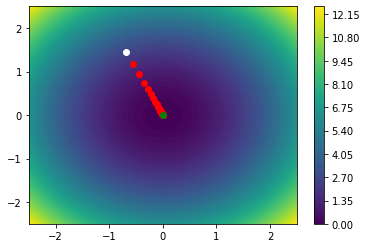

Solucion:  [-2.414914225986949e-49, 5.124418693973472e-49] 3.2091477670018933e-97


In [74]:
f = lambda X: X[0]**2+X[1]**2 #Función
df = lambda X: [2*X[0], 2*X[1]] #Gradiante
print (df)

#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango = 2.5
X=np.linspace(-rango, rango, resolucion)
Y=np.linspace(-rango, rango, resolucion)
Z=np.zeros((resolucion,resolucion))
for ix, x in enumerate(X):
  for iy, y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()
P=[random.uniform(-2,2 ),random.uniform(-2,2 )]
plt.plot(P[0],P[1], "o", c="white")
#Tasa de aprendizaje
TA =.1

#Iteraciones
for _ in range(500):
  grad = df(P)
  #print(P.grad)
  P[0],P[1] = P[0] - TA*grad[0], P[1] - TA*grad[1]
  plt.plot(P[0],P[1], "o", c="red")

plt.plot(P[0],P[1],"o", c="green")
plt.show()
print("Solucion: ", P, f(P))

In [9]:
#definimos la funcion
# sin(1/2 * x^2 - 1/4 * y^2 +3) * cos(2*x + 1 - E^y)
f = lambda X: np.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * np.cos(2 * X[0] + 1 - np.e**X[1])

In [32]:
#Aproximamos el valor del graciente en un punto por su definición.
def df(PUNTO):
  h = 0.01
  T = np.copy(PUNTO)
  grad = np.zeros(2)
  for it, th in enumerate(PUNTO):
    T[it] = T[it] + h
    grad[it] = (f(T) - f(PUNTO)) / h
  return grad